<a href="https://colab.research.google.com/github/adit26data/Predictive_Analysis_DA1_21BCE2651/blob/main/Predictive_Analysis_DA_1_21BCE2651.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Preprocessing starts here now.
Preprocessing generally involves the follwing steps:
1. Transformations in the data
2. Handling missing data
3. Handling imbalanced data


In [14]:
#checking for transformations of the data and missing values first
df.isnull().sum()

,0
date,0
open,7
high,4
low,4
close,0
volume,0
Name,1


Here imputation doesnt make sense as the data values missing here are very less so dropping the records where these values are null will not lead to significant loss of data or accuracy.
The size of the data is also very huge as compared to the missing values so simply dropping the rows of missing values is the most appropriate path.


In [15]:
df.shape

(460776, 7)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(460768, 7)

In [24]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


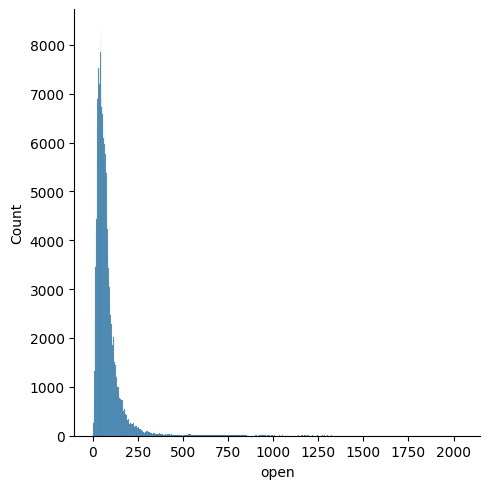

In [25]:
#moving on to the transformations now and skewness calculations
#plotting the data columns first
sns.displot(df['open'])

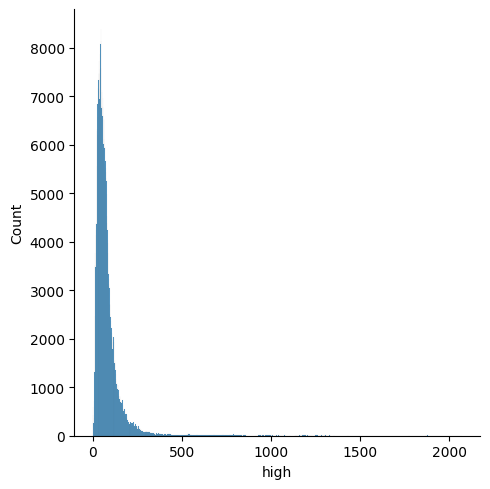

In [26]:
sns.displot(df['high'])

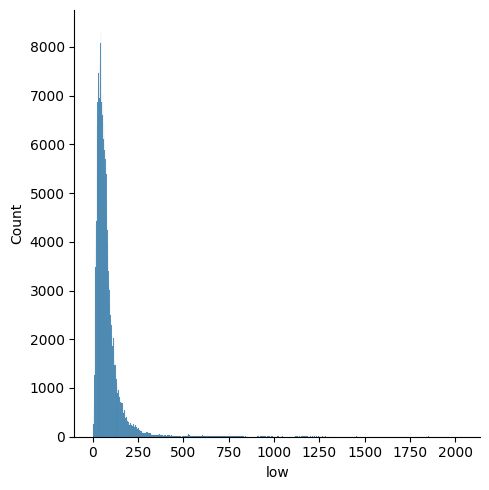

In [27]:
sns.displot(df['low'])

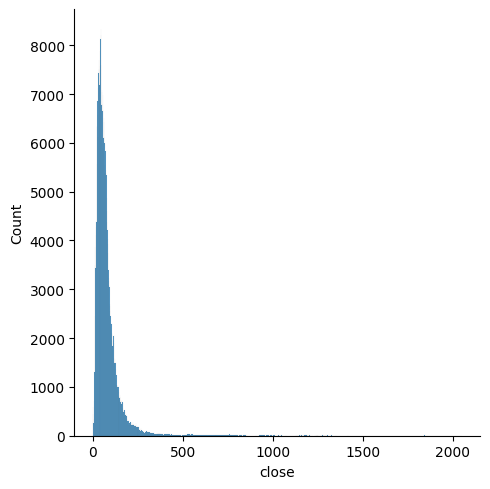

In [28]:
sns.displot(df['close'])

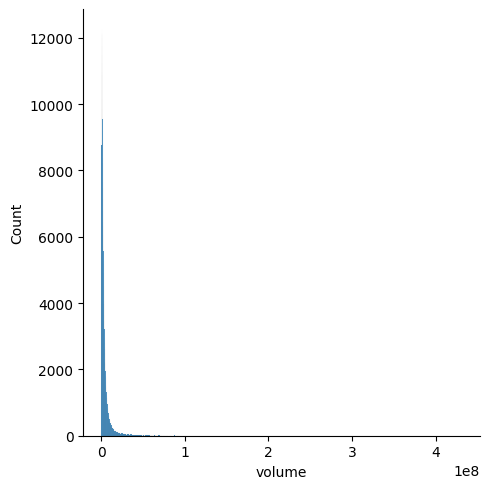

In [29]:
sns.displot(df['volume'])

In [32]:
df.iloc[:,1:6].skew(axis=0, skipna=True)

,0
open,7.391054
high,7.384050
low,7.399779
close,7.392587
volume,9.301606


As you can see that for the natural data the skewness is +ve that means its the right skewed data and we have to now apply box cox transformation to the columns to make them normalised as per the Gaussian distribution.



In [37]:
from scipy import stats
df['open'], fitted_lambda = stats.boxcox(df['open'])

In [38]:
fitted_lambda

-0.08600542907448748

In [39]:
df['close'], fitted_lambda = stats.boxcox(df['close'])

In [40]:
fitted_lambda

-0.08580819927584159

In [41]:
df['high'], fitted_lambda = stats.boxcox(df['high'])

In [42]:
fitted_lambda

-0.08803952796384538

In [43]:
df['low'], fitted_lambda = stats.boxcox(df['low'])

In [44]:
fitted_lambda

-0.08374300957861744

In [45]:
df['volume'], fitted_lambda = stats.boxcox(df['volume'])

In [46]:
fitted_lambda

-0.10935396941061214

For all columns except the Volume predictor we have lambda = -0.8 approximately which means we have Box Cox transformation of type: square root type
and for volume we have square root type as well.


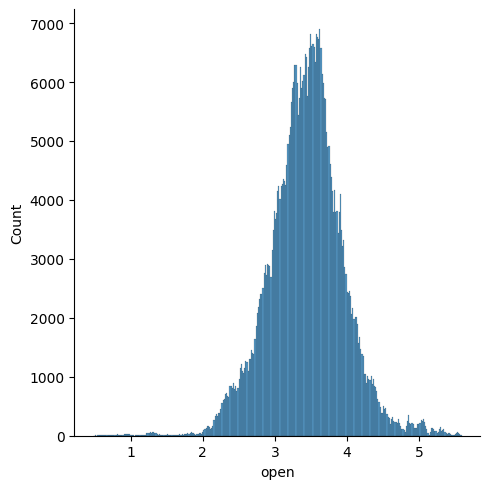

In [47]:
sns.displot(df['open'])

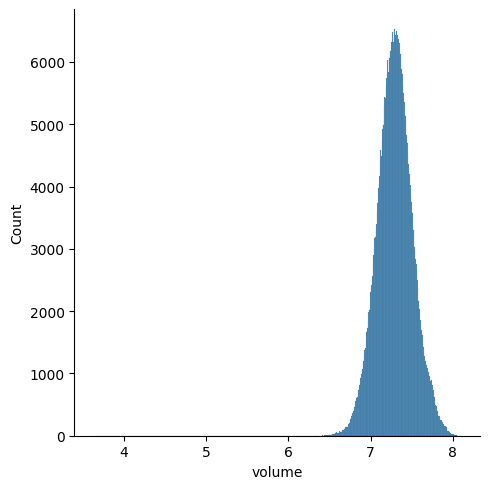

In [48]:
sns.displot(df['volume'])

In [50]:
df.iloc[:,1:6].skew(axis = 0, skipna = True)

,0
open,-0.033780
high,-0.034286
low,-0.033188
close,-0.033724
volume,-0.013746


The above skew values are close to zero, making it roughly symmetric in nature now.

In [51]:
#calculating the kurtosis
df.iloc[:,1:6].kurtosis(axis = 0, skipna = True)

,0
open,1.631000
high,1.620268
low,1.642463
close,1.631921
volume,0.491486


The +ve values of kurtosis means that the data is platykurtic.

In [52]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,2.419498,2.415702,2.403009,2.403098,7.545331,AAL
1,2013-02-11,2.409977,2.409951,2.382526,2.387323,7.554904,AAL
2,2013-02-12,2.386168,2.383220,2.373489,2.376799,7.539364,AAL
3,2013-02-13,2.377871,2.406267,2.381964,2.398239,7.579772,AAL
4,2013-02-14,2.412634,2.407322,2.318049,2.361011,7.762240,AAL


Now the question arises to process the categorical data like the date and the Name fields.
For the we can use the OneHot encoder or the LabelEncoder.
However to deal with dates is a different matter altogether.
We need to seperate them into day, month and year ie means adding the predictor and then we can encode the year and the month and the date seperately if the need arises

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460768 entries, 0 to 460774
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    460768 non-null  object 
 1   open    460768 non-null  float64
 2   high    460768 non-null  float64
 3   low     460768 non-null  float64
 4   close   460768 non-null  float64
 5   volume  460768 non-null  float64
 6   Name    460768 non-null  object 
dtypes: float64(5), object(2)
memory usage: 28.1+ MB


In [54]:
df['date'] = pd.to_datetime(df['date'])

In [55]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460768 entries, 0 to 460774
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    460768 non-null  datetime64[ns]
 1   open    460768 non-null  float64       
 2   high    460768 non-null  float64       
 3   low     460768 non-null  float64       
 4   close   460768 non-null  float64       
 5   volume  460768 non-null  float64       
 6   Name    460768 non-null  object        
 7   day     460768 non-null  int32         
 8   month   460768 non-null  int32         
 9   year    460768 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(1)
memory usage: 33.4+ MB


In [57]:
df.head()

,date,open,high,low,close,volume,Name,day,month,year
0,2013-02-08,2.419498,2.415702,2.403009,2.403098,7.545331,AAL,8,2,2013
1,2013-02-11,2.409977,2.409951,2.382526,2.387323,7.554904,AAL,11,2,2013
2,2013-02-12,2.386168,2.383220,2.373489,2.376799,7.539364,AAL,12,2,2013
3,2013-02-13,2.377871,2.406267,2.381964,2.398239,7.579772,AAL,13,2,2013
4,2013-02-14,2.412634,2.407322,2.318049,2.361011,7.762240,AAL,14,2,2013


In [58]:
#Finding all unique values in the Name columns:
df['Name'].unique().size()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [59]:
len(df['Name'].unique())

377

Since there are 377 values in the categorical field, we need to apply label encoding to assign each stock name a unique value

In [60]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['Name'])
df['Name_label'] = labels

In [65]:
df.head()

,date,open,high,low,close,volume,Name,day,month,year,Name_label
0,2013-02-08,2.419498,2.415702,2.403009,2.403098,7.545331,AAL,8,2,2013,1
1,2013-02-11,2.409977,2.409951,2.382526,2.387323,7.554904,AAL,11,2,2013,1
2,2013-02-12,2.386168,2.383220,2.373489,2.376799,7.539364,AAL,12,2,2013,1
3,2013-02-13,2.377871,2.406267,2.381964,2.398239,7.579772,AAL,13,2,2013,1
4,2013-02-14,2.412634,2.407322,2.318049,2.361011,7.762240,AAL,14,2,2013,1


Scaling the data now.


<Axes: ylabel='open'>

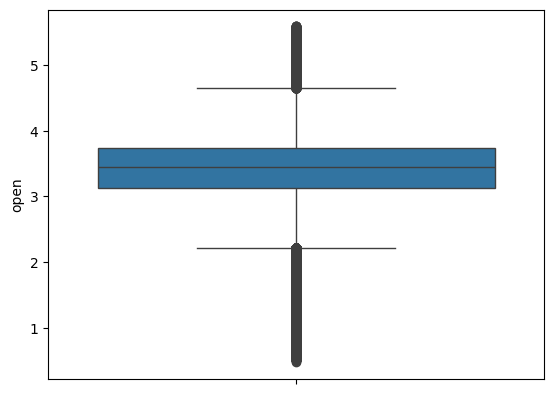

In [66]:
sns.boxplot(df['open'])

<Axes: ylabel='volume'>

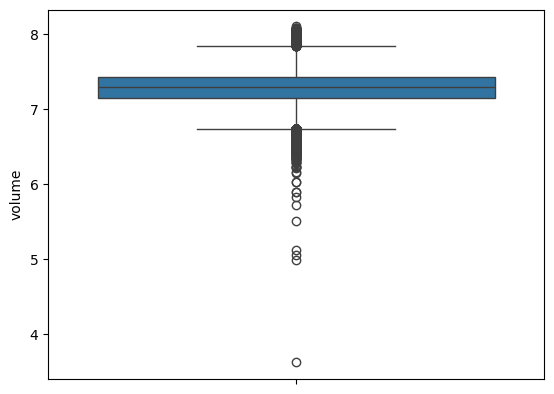

In [67]:
sns.boxplot(df['volume'])

<Axes: ylabel='close'>

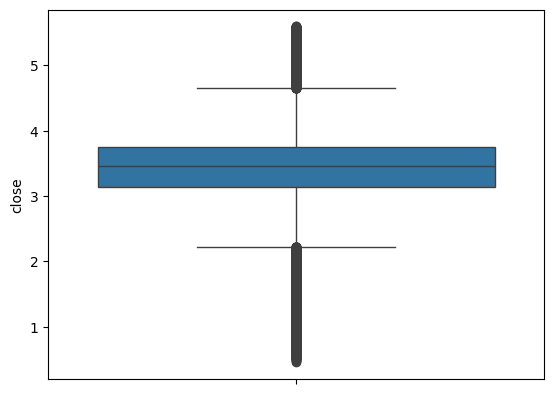

In [68]:
sns.boxplot(df['close'])

<Axes: ylabel='high'>

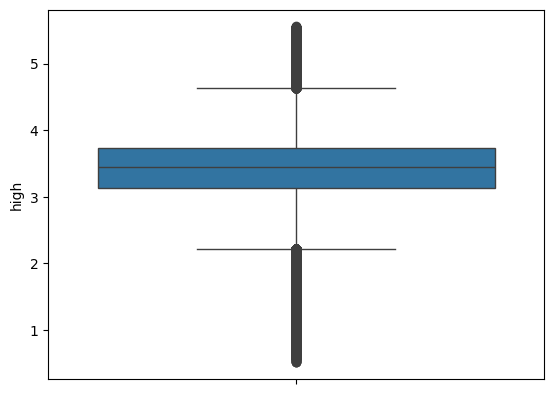

In [69]:
sns.boxplot(df['high'])

<Axes: ylabel='low'>

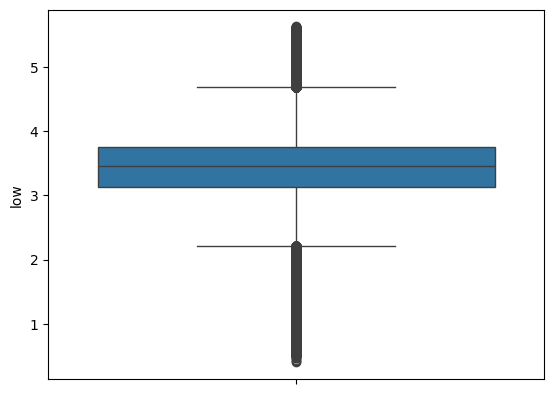

In [70]:
sns.boxplot(df['low'])

Incase of open, high, close, low we dont have outliers so we can use the min max normalisation but in case of volume we can use standard scaler.

In [77]:
df2 = df.copy()
df2 = df2.drop(['date','Name','day','month','year','Name_label'], axis = 1)

In [82]:
df3 = df2.copy()
df4 = df3.drop('volume', axis = 1)

In [85]:
scaler = MinMaxScaler()
df4 = scaler.fit_transform(df4)

In [86]:
df3 = df3['volume']

In [87]:
df3.head()

,volume
0,7.545331
1,7.554904
2,7.539364
3,7.579772
4,7.762240


In [88]:
std_scaler = StandardScaler()

In [90]:
df3 = std_scaler.fit_transform(df3.values.reshape(-1,1))

In [91]:
df3

array([[ 1.1736682 ],
       [ 1.21825159],
       [ 1.14587888],
       ...,
       [-1.03891999],
       [-1.12413604],
       [-1.2174163 ]])

In [92]:
df3 = pd.DataFrame(df3, columns=['volume'])

In [101]:
df4 = pd.DataFrame(df4, columns=['open', 'high', 'low', 'close'])

In [104]:
df4 = pd.concat([df4,df3],axis = 1)

In [105]:
df4.head()

,open,high,low,close,volume
0,0.380371,0.377127,0.382996,0.378970,1.173668
1,0.378511,0.375987,0.379082,0.375902,1.218252
2,0.373859,0.370689,0.377355,0.373855,1.145879
3,0.372238,0.375257,0.378974,0.378025,1.334064
4,0.379030,0.375466,0.366761,0.370784,2.183850


In [106]:
df = pd.concat([df4,df['date'],df['Name'],df['day'],df['month'],df['year'],df['Name_label']], axis = 1)

In [107]:
df.head()

,open,high,low,close,volume,date,Name,day,month,year,Name_label
0,0.380371,0.377127,0.382996,0.378970,1.173668,2013-02-08,AAL,8.0,2.0,2013.0,1.0
1,0.378511,0.375987,0.379082,0.375902,1.218252,2013-02-11,AAL,11.0,2.0,2013.0,1.0
2,0.373859,0.370689,0.377355,0.373855,1.145879,2013-02-12,AAL,12.0,2.0,2013.0,1.0
3,0.372238,0.375257,0.378974,0.378025,1.334064,2013-02-13,AAL,13.0,2.0,2013.0,1.0
4,0.379030,0.375466,0.366761,0.370784,2.183850,2013-02-14,AAL,14.0,2.0,2013.0,1.0


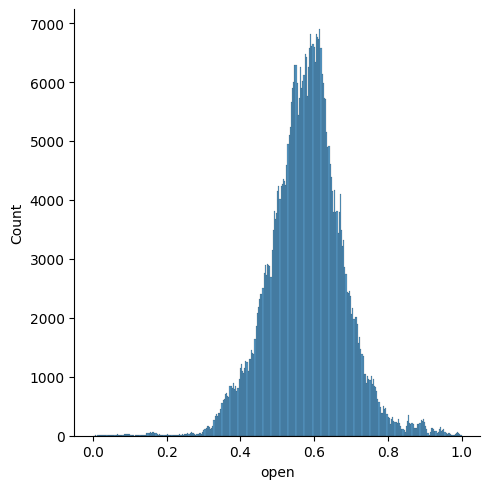

In [108]:
sns.displot(df['open'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460775 entries, 0 to 460774
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   open        460768 non-null  float64       
 1   high        460768 non-null  float64       
 2   low         460768 non-null  float64       
 3   close       460768 non-null  float64       
 4   volume      460768 non-null  float64       
 5   date        460768 non-null  datetime64[ns]
 6   Name        460768 non-null  object        
 7   day         460768 non-null  float64       
 8   month       460768 non-null  float64       
 9   year        460768 non-null  float64       
 10  Name_label  460768 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 38.7+ MB
